<a id='Main'></a>
<img src="https://storage.googleapis.com/kaggle-datasets-images/138/287/229bfb5d3dd1a49cc5ac899c45ca2213/dataset-cover.png" >

# Project: Investigate  TMDB Movie Dataset.


<h2><span style="color: #0000ff;"><strong>Please pick up a section in the report :</strong></span></h2>
<ol style="list-style: none; font-size: 14px; line-height: 32px; font-weight: bold;">
    
<ul>
<li style="clear: both;">
<a href="#intro"><img src="https://cdn.dribbble.com/users/400493/screenshots/2703191/hello.gif" alt="Hi" class="bg-primary mb-1" width="200px" align="left"> 
<h2>Introduction</h2>

    
</a></li>
<li style="clear: both;">
<a href="#wrangling"><img src="https://thumbs.gfycat.com/ClearcutGrizzledHeron-small.gif" alt="Wrangling"  width="200px" align="left"> 
<h2>Data Wrangling.</h2>

    
</a></li>
<li style="clear: both;">
<a href="#eda"><img 
src="https://institute.careerguide.com/wp-content/uploads/2020/10/7a2fc27b966a50792117d375a24bb71e.gif" alt="Explore" class="bg-primary mb-1" width="200px" align="left"> 
<h2>Exploratory Data Analysis.</h2>

</a></li>
<li style="clear: both;">
<a href="#conclusions"><img 
src="https://www.sendiancreations.com/ar/wp-content/uploads/2019/05/opening.gif" alt="Wrangling" class="bg-primary mb-1" width="200px" align="left"> 
<h2>Conclusions.</h2>

</a></li>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;</p>
<p>&nbsp;</p>

</ul>

<img src="https://i.pinimg.com/736x/24/ab/fe/24abfe29add0647e3c0e82671b778e14.jpg" width="300"  align="right">


<a id='intro'></a>
## Introduction


>>
**TMDB Movie Dataset**:This data set contains information
about  10800 movies collected from
The Movie Database (TMDb), I am going to Investigate some questions using it.

> **We have in this dataset 21 columns**:
'id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj'

## I have two Questions to answer:

>>**1.Does the revenue depends on the Budget spent?**

>>**2.Which director is more professional " used low budget and get high vote average for his movies"?**

#### Importing the liberaries  here!.

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
import ipywidgets as widgets # i will import ipywidgets to use some features like interact
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Run the next cell to put data frames in solid borders .

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {border-style: solid;}
<script type="text/javascript">
    Ipython.notebook.kernel.excute("f=12")
</script>

<img src="https://i.pinimg.com/736x/24/ab/fe/24abfe29add0647e3c0e82671b778e14.jpg" width="300"  align="right">


<a id='wrangling'></a>
## Data Wrangling

> **Hint**: In this section of the report, I will load in the data and check for cleanliness. 


<img src="https://cdn.dribbble.com/users/43718/screenshots/1137873/loadinganimation1.gif" width="150px" align="left">
<br></br>
<br></br>
<h2>General Properties.</h2>



In [3]:
# here i will read the data and define some functions to use them in widgets
df=pd.read_csv('tmdb-movies.csv')
temp_df=pd.DataFrame()
def show_data(raw=0):
    temp_df=df.loc[raw:raw+4]
    return temp_df
# the following function enables me to see the null values in columns later 
null_temp=pd.DataFrame()
def check_null(Col='id'):
    null_temp=df[df[Col].isnull()]
    return null_temp

### *Use the slider under the next cell to view the data 5 raws per time!

In [4]:
#this code enables me to interact with df to see all raws ,5 raws per time
widgets.interact(show_data,raw=(1,df.index.max(),5));

interactive(children=(IntSlider(value=1, description='raw', max=10865, min=1, step=5), Output()), _dom_classes…

In [5]:
#here I will get some information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#  -------------------------------------------------------------------------------------
### First let's see the nulls raws in the data set to evaluate if we can drop some of them.


In [6]:
#this interact function enables me to use the finding nulls function check_null()
widgets.interact(check_null, Col=['production_companies','homepage','keywords','tagline','cast','imdb_id']);

interactive(children=(Dropdown(description='Col', options=('production_companies', 'homepage', 'keywords', 'ta…

### let's see the five number summary for the data  and some statistics.

In [7]:
#here i will see the five number summary for the data 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Here we will find the  count of the unique values in each column and identify if there are any duplicated values.

In [8]:
#view the number of unique values in the dataframes columns
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [9]:
#here I will call the duplicated row in the data set.
df[df.duplicated()==True]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


####  Look at the next Histograms and note that :
##### after the year 2010 they produce more movies than before.


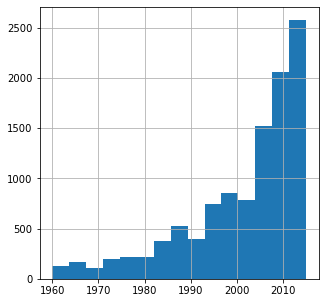

In [10]:
df.release_year.hist( bins=15,figsize=(5,5), label = 'good');


## I found some issues like:

#####     .we have 2 unwanted  columns with alot of misssing data ('homepage' and 'tagline').
#####     .we have nulls in some culumns.
#####     .The column  'release_date' datatype is not date and time.
#####     .some values is zero we can fill using interpolate.
#####     .we have one dupicated value need to be droped.


<img src="https://i.pinimg.com/736x/24/ab/fe/24abfe29add0647e3c0e82671b778e14.jpg" width="300"  align="right">



<img src="https://uploads-ssl.webflow.com/5ebeb41e0cdac7c04b3c373a/5f0a0574adf578b75483ab77_Animation_OfficeCleaning-para-web.gif" width="150px" align="left">
<br></br>
<br></br>
<br></br>
<h2>Data Cleaning.</h2>



In [11]:
#1.drop dupicates
df.drop_duplicates(inplace=True)
#2.drop the 2 columns i don't nead to avoid shrinking data after dropna
df.drop(['homepage','tagline'],axis=1,inplace=True)
#3.Drop nulls and restore the index
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
#4.convert the type of release_date to datetime
df.release_date = df.release_date.apply(pd.to_datetime)   
#5.fill the zeros with the mean depending on the values in the column
df.interpolate(inplace=True)

In [12]:
#check if there is any issue
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8664 entries, 0 to 8663
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    8664 non-null   int64         
 1   imdb_id               8664 non-null   object        
 2   popularity            8664 non-null   float64       
 3   budget                8664 non-null   int64         
 4   revenue               8664 non-null   int64         
 5   original_title        8664 non-null   object        
 6   cast                  8664 non-null   object        
 7   director              8664 non-null   object        
 8   keywords              8664 non-null   object        
 9   overview              8664 non-null   object        
 10  runtime               8664 non-null   int64         
 11  genres                8664 non-null   object        
 12  production_companies  8664 non-null   object        
 13  release_date      

<img src="https://i.pinimg.com/736x/24/ab/fe/24abfe29add0647e3c0e82671b778e14.jpg" width="300"  align="right">


<a id='eda'></a>
## Exploratory Data Analysis


 
<img src="https://www.servicesca.org/images/0212qm%20(1).gif" width="50px" align="left">
<br></br>
<br></br>
<h4> Question 1 (Does the revenue depends on the Budget spent!).</h4>


In [13]:
# First I will group the revenue by year
years_rev=df.groupby('release_year')['revenue'].sum()
#second I will group the budget by year
years_budget=df.groupby('release_year')['budget'].sum()
# Finally I will find the net profit
profit=years_rev-years_budget

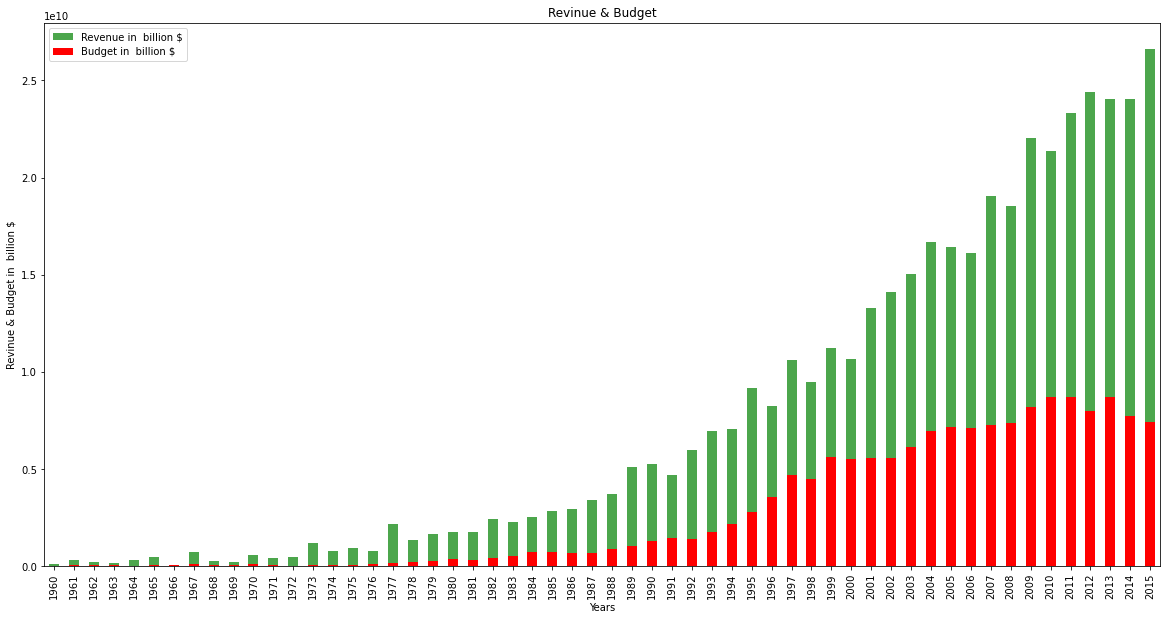

In [14]:
years_rev.plot(color='green',alpha=0.7,kind='bar',figsize=(20,10),label='Revenue in  billion $' ,ylabel='Revinue & Budget in  billion $',xlabel='Years',title='Revinue & Budget');
years_budget.plot(color='red',kind='bar',figsize=(20,10),label='Budget in  billion $',ylabel='Revinue & Budget in  billion $',xlabel='Years',title='Revinue & Budget');
plt.legend();

#### As we see here the budget for 2015 as an example  was less than 2013, but the revenue in 2015 is more than 2013.

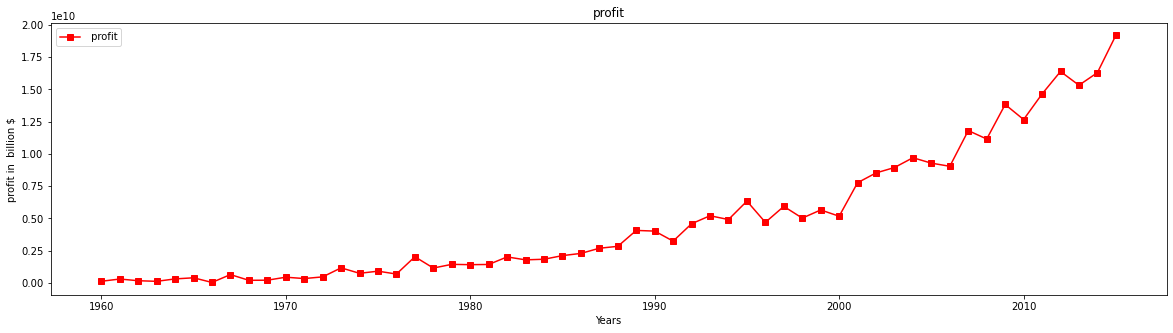

In [15]:
profit.plot(style='-s',figsize=(20,5),color='r',ylabel='profit in  billion $',xlabel='Years',label=' profit',title='profit');
plt.legend();

#### As we see here the profit increasing in 2015 than 2013.

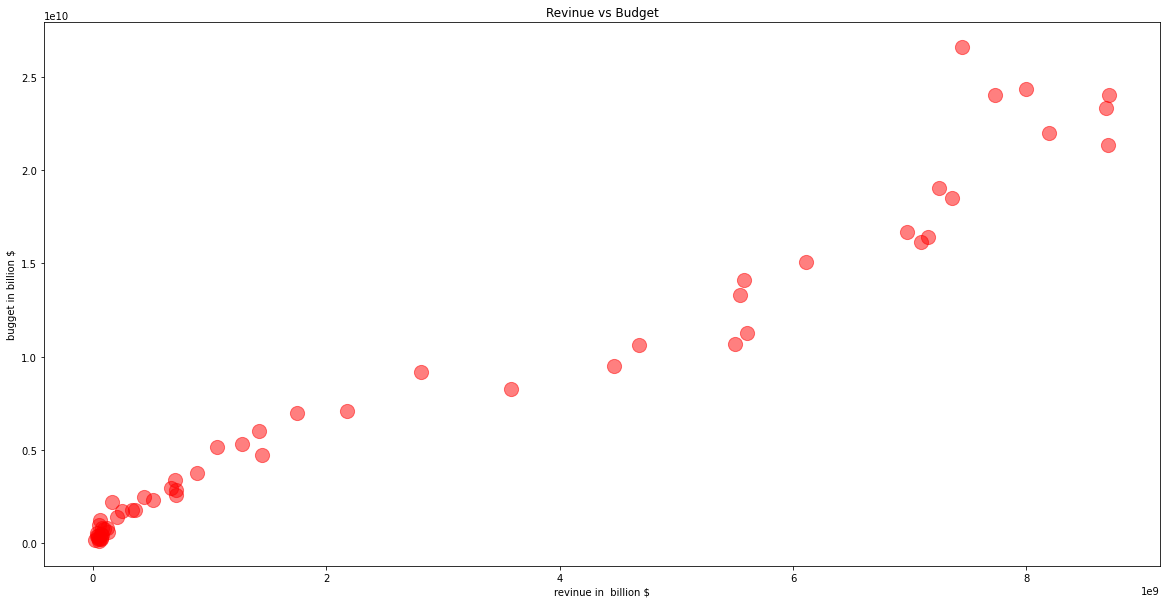

In [16]:
#check the correlation between budgget and revenue over the years.
plt.figure(figsize=(20,10))
plt.scatter(x=years_budget,y=years_rev, c='r',s=200, alpha=0.5);
plt.gca().update(dict(title='Revinue vs Budget', xlabel='revinue in  billion $', ylabel='bugget in billion $'))
plt.show();

### Finally the scatter plot said its word....there are no relationship between budget and revenue.



<img src="https://www.servicesca.org/images/0212qm%20(1).gif" width="50px" align="left">
<br></br>
<br></br>
<h4> Question 2  (Which director used low budget and get high vote average !).</h4>


In [17]:
#first i will get the median of the two elements "vote_average" & "budget" allover the dataframe
vote_mid=df.vote_average.median()
budget_mid=df.budget.median()
print( 'the median of vote_average is: ',vote_mid)
print( 'the median of budget is: ',budget_mid)

# now I will filter the budget column to get the lower budget then filter them by the high vote rate
low_budget=df[df.budget < budget_mid]
high_votes=low_budget[low_budget['vote_average']<vote_mid]


the median of vote_average is:  6.1
the median of budget is:  1500000.0


In [18]:
#create a dataframe contains the maximum vote rate from the lowest budget used
max_vote=high_votes['vote_average'].max()
high_votes=high_votes[high_votes['vote_average']== max_vote]
#most commen director in using low budget and get high votes rate
print('The director  used low budget and get high vote average is:  ',high_votes.director.mode()[0])

The director  used low budget and get high vote average is:   Clive Donner


<img src="https://i.pinimg.com/736x/24/ab/fe/24abfe29add0647e3c0e82671b778e14.jpg" width="300"  align="right">


<a id='conclusions'></a>
## Conclusions

##### * In this section I will answer the two questions we have,
###### * but first we must know that this conclusion depend on just 8664 records of more than 10000 records in the data set.
###### * second thing you must know that  all the data set does not represent the whole market but we can use it to predect some answers.
###### * in answering the second question we divided the average of votes by median and if we have outliers this value will not divide the data to equals parts.

> **Answer for Q1**: Finally, I can say that  the revenue do not depend on budget spent  !

> **Answer for Q2**:  I can say that  the most professional director   who used the low budget and his movies get the high vote rate is :  Clive Donner !



<img src="https://i.pinimg.com/736x/24/ab/fe/24abfe29add0647e3c0e82671b778e14.jpg" width="300"  align="right">


In [110]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

[By: Mohammad Shaaban](https://www.linkedin.com/in/𝕄𝕠𝕙𝕒𝕞𝕞𝕒𝕕-𝕊𝕙𝕒𝕒𝕓𝕒𝕟-𝕄𝕦𝕤𝕥𝕒𝕗𝕒-4b132a110/)